## Introduction
We've accomplished a lot so far in this course and now it's time to put our data cleaning skills to work!

Working on guided projects gives you hands on experience with real world examples, which also means they'll be more challenging than lessons. However, keep in mind that now you have more tools you can use to clean and transform data than you did at the beginning of this course, including:

* Vectorized string methods to clean string columns
* The `apply()`, `map()`, and `applymap()` methods to transform data
* The `fillna()`, `dropna()`, and `drop()` methods to drop missing or unnecessary values
* The `melt()` function to reshape data
* The `concat()` and `merge()` functions to combine data

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data here. The original TAFE exit survey data is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

### Instructions
* Start by writing a paragraph in a markdown cell introducing the project and the dataset.
* Import the pandas and NumPy libraries.
* Read the `dete_survey.csv` CSV file into pandas, and assign it to the variable name `dete_survey`.
* Read the `tafe_survey.csv CSV` file into pandas, and assign it to the variable name `tafe_survey`.
* Use the `DataFrame.info()` and `DataFrame.head()` methods to print information about both dataframes, as well as the first few rows. Use other data exploration methods such as the `Series.value_counts()` and `DataFrame.isnull()` methods to explore the data and figure out some next steps.
  * Write a markdown cell briefly describing your observations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

let's explore our dataset and note down our observations

In [3]:
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Identify Missing Values and Drop Unnecessary Columns
Often, figuring out the steps you need to take to clean and reshape your data is the hardest part. If you couldn't find a clear path forward in the last screen, don't worry! We'll lay out the steps for you, but give you some room to start making your own decisions.

From our work in the previous screen, we can first make the following observations:

* The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.
* Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
*  There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues. Recall that we can use the `pd.read_csv()` function to specify values that should be represented as `NaN`. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

## Instructions
* Read the `dete_survey.csv` CSV file into pandas again, but this time read the `Not Stated` values in as `NaN`.
  * To read `Not Stated` in as `NaN`, set the `na_values` parameter to `Not Stated` in the `pd.read_csv()` function.
  * Assign the result to the variable name `dete_survey`.
* Then, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.
  * Use the `DataFrame.drop()` method to drop the following columns from `dete_survey: dete_survey.columns[28:49]`. Remember to set the `axis` parameter equal to `1`.
    * Assign the result to `dete_survey_updated`.
  * Use the `DataFrame.drop()` method to drop the following columns from `tafe_survey: tafe_survey.columns[17:66]`. Remember to set the `axis` parameter equal to `1`.
    * Assign the result to `tafe_survey_updated`.

* Write a markdown cell explaining the changes you made and why.

In [5]:
dete_survey = pd.read_csv('dete_survey.csv',na_values=['Not Stated'])

In [6]:
#let us drop certain columns we will not be needing for this analysis
col_to_drop = dete_survey.columns[28:49]

dete_survey.drop(col_to_drop,axis=1,inplace=True)

In [7]:
col_to_drop2 = tafe_survey.columns[17:66]
tafe_survey.drop(col_to_drop2,axis=1,inplace=True)

## Cleaning the column names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

dete_survey|tafe_survey	|Definition
---|---|--|
ID	|Record ID	|An id used to identify the participant of the survey
SeparationType|	Reason for ceasing employment|	The reason why the participant's employment ended
Cease Date	|CESSATION YEAR	|The year or month the participant's employment ended
DETE Start Date	| |	The year the participant began employment with the DETE
|LengthofServiceOverall.|Overall Length of Service at Institute (in years)	The length of the person's employment (in years)
Age	|CurrentAge.Current Age	|The age of the participant
Gender|	Gender.What is your Gender?	|The gender of the participant


Because we eventually want to combine them, we'll have to standardize the column names.

## Instructions
* Rename the remaining columns in the `dete_survey_updated` dataframe.
  * Use the following criteria to update the column names:
    * Make all the capitalization lowercase.
    * Remove any trailing whitespace from the end of the strings.
    * Replace spaces with underscores `('_')`.
  * As an example, `Cease Date` should be updated to `cease_date`.
  * Remember you can use the `DataFrame.columns` attribute to print an array of the existing column names.
* Use the `DataFrame.rename()` method to update the columns below in `tafe_survey_updated`. Don't worry about the rest of the column names right now - we'll handle them later.
  * `'Record ID': 'id'`
  * `'CESSATION YEAR'`: `'cease_date'`
  * `'Reason for ceasing employment'`: `'separationtype'` 
  * `'Gender. What is your Gender?'`: `'gender'`
  * `'CurrentAge. Current Age'`: `'age'`
  * `'Employment Type. Employment Type'`:` 'employment_status'`
  * `'Classification. Classification'`:` 'position'`
  * `'LengthofServiceOverall. Overall Length of Service at Institute (in years)'`: `'institute_service'`
  * `LengthofServiceCurrent. Length of Service at current workplace (in years)'`: `'role_service'`
* Use the `DataFrame.head()` method to look at the current state of the `dete_survey_updated` and `tafe_survey_updated` dataframes and make sure your changes look good.

In [8]:
#let's take a look at the columns of each dataframe again

dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [9]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

let's rename some of the columns in the `tafe_survey` dataset first.

In [10]:
col_to_rename = {'Record ID': 'id','CESSATION YEAR': 'cease_date',
                 'Reason for ceasing employment': 'separationtype',
                 'Gender. What is your Gender?': 'gender',
                 'CurrentAge. Current Age': 'age',
                 'Employment Type. Employment Type': 'employment_status',
                 'Classification. Classification': 'position',
                 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey.rename(col_to_rename, axis=1,inplace=True)

now that we have renamed some columns, let us go ahead to clean up our columns a little bit

In [11]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [12]:
dete_survey.columns = dete_survey.columns.str.replace(' ','_').str.strip().str.lower()  

In [13]:
dete_survey.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
tafe_survey.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter the Data
In the last screen, we renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `'Resignation'`.

If you're interested in a challenge, try to complete the project using all of the separation types instead - you'll find more issues to work through in the data cleaning process.

Note that dete_survey_updated dataframe contains multiple separation types with the string `'Resignation'`:

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

Remember that we'll have to account for each of these variations so we don't unintentionally drop data!

In this step, note that you may see what is known as a SettingWithCopy Warning. This won't prevent your code from running properly but it's just letting you know that whatever operation you're doing is trying to be set on a copy of a slice from a dataframe. We'll include instructions below to get around this.

### Instructions
* Use the `Series.value_counts()` method to review the unique values in the separationtype column in both `dete_survey_updated` and `tafe_survey_updated`.
* In each of dataframes, select only the data for survey respondents who have a `Resignation` separation type.
  * Remember that the `dete_survey_updated` dataframe contains three `Resignation` separation types. We want to select all of them.
 * Use the `DataFrame.copy()` method on the result to avoid the SettingWithCopy Warning.
 * Assign the result for `dete_survey_updated` to `dete_resignations`.
 * Assign the result for `tafe_survey_updated` to `tafe_resignations`.

In [15]:
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

To avoid the SettingWithCopy Warning, we will carry out further cleaning in a copy of the dataframe

In [16]:
dete_copy= dete_survey.copy()

In [17]:
dete_copy['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
dete_resign = dete_copy[dete_copy['separationtype'].str.startswith('Resignation', na=False)]

In [19]:
dete_resign['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

Now, let us work on the the `tafe_survey` dataframe

In [20]:
#let us create a copy of the dataframe

tafe_copy = tafe_survey.copy()

In [21]:
tafe_copy['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
tafe_resign = tafe_copy[tafe_copy['separationtype'] == 'Resignation']

## Verify the Data
Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). When you're working with real world data, don't assume that the data you're analyzing isn't corrupted in some way!

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well!

* Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

### Instructions
* Check the years in each dataframe for logical inconsistencies.
  * First, clean the cease_date column in dete_resignations.
    * Use the `Series.value_counts()` method to view the unique values in the `cease_date column`.
    * Use vectorized string methods to extract the year. As a reminder, here is the full list.
    * Use the `Series.astype()` method method to convert the type to a float.
  * Use the `Series.value_counts()` to check the values in the `cease_date` and `dete_start_date` columns in `dete_resignations` and the  `cease_date column` in `tafe_resignations`.
    * Because `Series.value_counts()` returns a series, we can use `Series.sort_index()` method with `ascending= True or False` to view the highest and lowest values with their counts.
  * You can also plot the values of any numeric columns with a boxplot to identify any values that look wrong.

In [23]:
dete_resign.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [24]:
dete_resign['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

As you can see, the minimum year in `dete_start_date` is 1963 which is reasonable so we don't have to do any cleaning there. now let us extract just the year from the `cease_date` column

In [25]:
dete_resign['cease_date'] = dete_resign['cease_date'].str.split('/').str.get(-1)

C:\Users\PC\AppData\Local\Temp\ipykernel_7256\2571527183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resign['cease_date'] = dete_resign['cease_date'].str.split('/').str.get(-1)


In [26]:
dete_resign['cease_date']

3      2012
5      2012
8      2012
9      2012
11     2012
       ... 
808    2013
815    2014
816    2014
819    2014
821    2013
Name: cease_date, Length: 311, dtype: object

Now we have succesfully extracted just the years we need, lets change the type back to integer

In [27]:
 dete_resign['cease_date'] = pd.to_numeric(dete_resign['cease_date'])

C:\Users\PC\AppData\Local\Temp\ipykernel_7256\448768749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resign['cease_date'] = pd.to_numeric(dete_resign['cease_date'])


In [28]:
dete_resign['cease_date'].value_counts().sort_index(ascending = False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [29]:
dete_resign['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [30]:
tafe_resign['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

## Create a New Column
From the work we did in the last screen, we can verify:

1. There aren't any major issues with the years.
2. The years in each dataframe don't span quite the same number of years. We'll leave it up to your discretion to drop any years you don't think are needed for the analysis.

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the `tafe_resignations` dataframe already contains a `"service"` column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

Do we have data that can be used to calculate the length of time the employee spent in their workplace? Take a minute to review `dete_resignations` once more and see if you can answer this question before moving on.

### Instructions
* Create an `institute_service` column in `dete_resignations`
  * Create a new column named `institute_service` in `dete_resignations`.
    * Subtract the `dete_start_date` from the `cease_date`. Assign the result to a new column named `institute_service`.

In [31]:
dete_resign['institute_service'] = dete_resign['cease_date'] - dete_resign['dete_start_date']

C:\Users\PC\AppData\Local\Temp\ipykernel_7256\1490906678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resign['institute_service'] = dete_resign['cease_date'] - dete_resign['dete_start_date']


In [32]:
dete_resign[['cease_date','dete_start_date','institute_service']]

,cease_date,dete_start_date,institute_service
3,2012.0,2005.0,7.0
5,2012.0,1994.0,18.0
8,2012.0,2009.0,3.0
9,2012.0,1997.0,15.0
11,2012.0,2009.0,3.0
...,...,...,...
808,2013.0,2010.0,3.0
815,2014.0,2012.0,2.0
816,2014.0,2012.0,2.0
819,2014.0,2009.0,5.0


## Identify Dissatisfied Employees
In the last screen, we created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment.Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If you disagree, feel free to modify them! Just make sure you explain why you made that decision.

1. tafe_survey_updated:
   * `Contributing Factors. Dissatisfaction`
   * `Contributing Factors. Job Dissatisfaction`


2. dete_survey_updated:
   * `job_dissatisfaction`
   * `dissatisfaction_with_the_department`
   * `physical_work_environment`
   * `lack_of_recognition`
   * `lack_of_job_security`
   * `work_location`
   * `employment_conditions`
   * `work_life_balance`
   * `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.

To create the new column, we'll do the following:

1. Convert the values in the ``'Contributing Factors. Dissatisfaction' and `'Contributing Factors. Job Dissatisfaction'` columns in the `tafe_resignations` dataframe to `True`, `False`, or `NaN` values.
2. If any of the columns listed above contain a True value, we'll add a True value to a new column named dissatisfied. To accomplish this, we'll use the `DataFrame.any()` method to do the following:

   * Return `True` if any element in the selected columns above is `True`
   * Return `False` if none of the elements in the selected columns above is `True`
   * Return `NaN` if the value is `NaN`
   
   
Here's the syntax we can use:

`df.any(axis=1, skipna=False)`

### Instructions
* Use the `Series.value_counts()` method to view the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the `tafe_resignations` dataframe.
* Update the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the `tafe_resignations` dataframe so that each contains only `True`, `False,` or `NaN` values.
  * Write a function named update_vals that makes the following changes:
    * If the value is `NaN`, return `np.nan`. You can use the following criteria to check that a value is `NaN: pd.isnull(val)`.
    * If the value is `'-'`, return `False`.
    * For any other value, return `True`.
  * Use the `DataFrame.applymap()` method to apply the function above to the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the `tafe_resignations` dataframe.
    * Remember that we need to pass the update_vals function into the df.applymap() method without parentheses.
* Use the `df.any()` method as described above to create a dissatisfied column in BOTH the `tafe_resignations` and `dete_resignations` dataframes.
* Use the `df.copy()` method to create a copy of the results and avoid the SettingWithCopy Warning. Assign the results to `dete_resignations_up` and `tafe_resignations_up`.

In [33]:
tafe_resign['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [34]:
tafe_resign['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [35]:
tafe_resign['Contributing Factors. Job Dissatisfaction'].isnull().sum()

8

In [36]:
tafe_resign[tafe_resign['Contributing Factors. Job Dissatisfaction'].isnull()]

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
16,6.341770e+17,Brisbane North Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,6.341779e+17,Brisbane North Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,6.342141e+17,Southbank Institute of Technology,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,6.345510e+17,Tropical North Institute of TAFE,Non-Delivery (corporate),2011.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,6.345581e+17,SkillsTech Australia,Delivery (teaching),2011.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,6.346963e+17,Tropical North Institute of TAFE,Non-Delivery (corporate),2012.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,6.347827e+17,Southbank Institute of Technology,Non-Delivery (corporate),NaN,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,6.350124e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
tafe_resign[tafe_resign['Contributing Factors. Job Dissatisfaction'] == '-']

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


In [38]:
#let us replace the - with False
tafe_resign['Contributing Factors. Job Dissatisfaction'] = tafe_resign[
    'Contributing Factors. Job Dissatisfaction'].replace('-',False)

C:\Users\PC\AppData\Local\Temp\ipykernel_7256\1678650046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resign['Contributing Factors. Job Dissatisfaction'] = tafe_resign[


In [39]:
tafe_resign['Contributing Factors. Job Dissatisfaction'] = tafe_resign[
    'Contributing Factors. Job Dissatisfaction'].replace('Job Dissatisfaction',True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7256\876962318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resign['Contributing Factors. Job Dissatisfaction'] = tafe_resign[


In [40]:
tafe_resign['Contributing Factors. Dissatisfaction'] = tafe_resign[
    'Contributing Factors. Dissatisfaction'].replace('-',False)

C:\Users\PC\AppData\Local\Temp\ipykernel_7256\2957566701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resign['Contributing Factors. Dissatisfaction'] = tafe_resign[


In [41]:
tafe_resign['Contributing Factors. Dissatisfaction'] = tafe_resign[
    'Contributing Factors. Dissatisfaction'].replace('Contributing Factors. Dissatisfaction ',True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7256\4283230174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resign['Contributing Factors. Dissatisfaction'] = tafe_resign[


In [42]:
tafe_resign[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].head(20)

,Contributing Factors. Job Dissatisfaction,Contributing Factors. Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [43]:
tafe_resign['Contributing Factors. Dissatisfaction'].any()

True

In [44]:
tafe_resign['dissatisfied'] = tafe_resign[['Contributing Factors. Dissatisfaction', 
                                                 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_7256\848182632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resign['dissatisfied'] = tafe_resign[['Contributing Factors. Dissatisfaction',


In [45]:
#let's create a copy of the results to avoid this errors
dete_resign_up = dete_resign.copy()
tafe_resign_up = tafe_resign.copy()

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

### Instructions
* First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
  * Add a column named institute to `dete_resignations_up`. Each row should contain the value `DETE`.
  * Add a column named institute to `tafe_resignations_up`. Each row should contain the value `TAFE`.
* Combine the dataframes. Assign the result to `combined`.
* Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. Use the `DataFrame.dropna()` method to drop any columns with less than 500 non null values.
  * Remember that you can drop columns with less than a certain number of non null values with the `thresh` parameter.
  * Assign the result to `combined_updated`.

In [46]:
#add new column named 'Institute' to the two datasets
dete_resign_up['institute'] = 'DETE'
tafe_resign_up['institute'] = 'TAFE'

In [47]:
dete_resign_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,DETE


In [48]:
#let's combine the two dataframes

combined = pd.concat([tafe_resign_up,dete_resign_up],axis=0, ignore_index = True) 

In [49]:
combined.shape

(651, 53)

In [50]:
tafe_resign_up.shape

(340, 25)

In [51]:
dete_resign_up.shape

(311, 37)

In [52]:
#lets drop columns in 'combined' with more than 500 null values
combined.isnull().sum().sort_values()

id                                                       0
institute                                                0
separationtype                                           0
cease_date                                              16
position                                                53
employment_status                                       54
age                                                     55
gender                                                  59
institute_service                                       88
WorkArea                                               311
Institute                                              311
dissatisfied                                           311
Contributing Factors. Ill Health                       319
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Maternity/Family                 3

In [53]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    3

In [54]:
#let's drop columns with atleast 339 non-null values
combined = combined.dropna(thresh=339, axis=1)
missing = combined.isnull().sum() 

In [55]:
combined.notnull().sum().sort_values()

Institute            340
WorkArea             340
dissatisfied         340
institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
id                   651
separationtype       651
institute            651
dtype: int64

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service` column.

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Let's categorize the values in the institute_service column using the definitions above.

### Instructions
* First, we'll extract the years of service from each value in the `institute_service` column.
  * Use the `Series.astype()` method to change the type to `'str'`.
  * Use vectorized string methods to extract the years of service from each pattern. You can find the full list of vectorized string methods here.
  * Double check that you didn't miss extracting any digits.
  * Use the `Series.astype()` method to change the type to `'float'`.
* Next, we'll map each value to one of the career stage definitions above.
  * Create a function that maps each year value to one of the career stages above.
    * Remember that you'll have to handle missing values separately. You can use the following code to check if a value is `NaN`  where val is the name of the value: `pd.isnull(val)`.
  * Use the `Series.apply()` method to apply the function to the `institute_service column`. Assign the result to a new column named `service_cat`.


In [56]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
10.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2
33.0                   1


In [57]:
#let's first convert the datatype to string

combined['institute_service'] = combined['institute_service'].astype(str)

In [58]:
combined['institute_service'] = (combined['institute_service']
 .astype(str)
 .str.lower().str.replace('less', '')
 .str.replace('than', '')
 .str.replace('years','')
 .str.replace('more','')
 .str.replace('year','')
 .str.strip()
 .str.split('-')
 .str[0]
 .astype(float)
)

**Personal Note** :This was the method i used to arrive at my answer. this second is one i got from a helper project. the two gives the same results, but it looks like the helper code is less bulky.

In [59]:
(combined['institute_service']
 .astype(str)
 .str.split(pat='-')
 .str[0]
 .str.split(pat=' ')
 .str[0]
 .str.replace('Less', '0')
 .str.replace('More', '12')
 .astype(float)
)

0      NaN
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
646    3.0
647    2.0
648    2.0
649    5.0
650    NaN
Name: institute_service, Length: 651, dtype: float64

In [60]:
combined.head()

,id,Institute,WorkArea,cease_date,separationtype,gender,age,employment_status,position,institute_service,dissatisfied,institute
0,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,False,TAFE
1,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,Male,41 45,Permanent Full-time,Teacher (including LVT),3.0,False,TAFE
2,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,Female,56 or older,Contract/casual,Teacher (including LVT),7.0,False,TAFE
3,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Male,20 or younger,Temporary Full-time,Administration (AO),3.0,False,TAFE
4,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,Male,46 50,Permanent Full-time,Teacher (including LVT),3.0,False,TAFE


In [66]:
def service_cat(value):
    if pd.isnull(value):
        return np.nan
    elif value < 3:
        return 'New'
    elif value >=3 and value <= 6:
        return 'Experienced'
    elif value >=7 and value <= 10:
        return 'Established'
    else:
        return 'Veteran'

In [68]:
combined['service_cat'] = combined['institute_service'].apply(service_cat)

In [69]:
combined['service_cat']

0              NaN
1      Experienced
2      Established
3      Experienced
4      Experienced
          ...     
646    Experienced
647            New
648            New
649    Experienced
650            NaN
Name: service_cat, Length: 651, dtype: object

In the last screen, we created a `service_cat` column, that categorizes employees according to the amount of years spent in their workplace:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Now, let's finally do our first piece of analysis! We'll help you fill in missing values in the `dissatisfied` column and then aggregate the data to get you started, but note that we still have additional missing values left to deal with. This is meant to be an initial introduction to the analysis, not the final analysis.

Recall that the `dissatisfied` column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. That means that we can aggregate the `dissatisfied` column and calculate the number of people in each group, the percentage of people in each group, etc.

### Instructions
* Use the `Series.value_counts()` method to confirm if the number of `True` and `False` in the `dissatisfied` column. Set the `dropna` parameter to `False` to also confirm the number of missing values.
* Use the `DataFrame.fillna()` method to replace the missing values in the `dissatisfied` column with the value that occurs most frequently in this column, either `True` or `False`.
* Use the `DataFrame.pivot_table()` method to calculate the percentage of dissatisfied employees in each `service_cat` group.
  * Since a `True` value is considered to be `1`, calculating the mean will also calculate the percentage of dissatisfied employees. The default aggregation function is the mean, so you can exclude the `aggfunc` argument.
* Use the `DataFrame.plot()` method to plot the results. Set the `kind` parameter equal to `bar` to create a bar chart.
  * Make sure to run `%matplotlib inline` beforehand to show your plots in the notebook.

In [71]:
combined['dissatisfied'].value_counts(dropna = False) # to include the null rows

NaN      311
False    241
True      99
Name: dissatisfied, dtype: int64

In [74]:
combined['dissatisfied'].fillna(False,inplace=True)

In [76]:
combined['dissatisfied'].value_counts()

False    552
True      99
Name: dissatisfied, dtype: int64

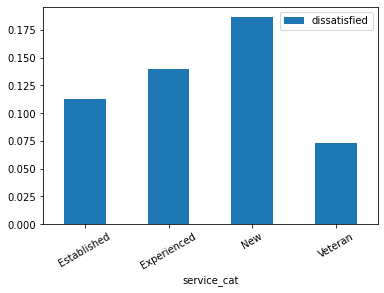

In [88]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
pivot_table = combined.pivot_table(index='service_cat', values='dissatisfied')
# Plot the results
%matplotlib inline
pivot_table.plot(kind='bar', rot=30);

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.